In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# popular data visualization theme
plt.style.use("fivethirtyeight")

### 数据结构的有无
- 结构化（有组织）数据：可以分成观察值和特征的数据，一般以表格的形式组织（行是观察值，列是特征）。
- 非结构化（无组织）数据：作为自由流动的实体，不遵循标准组织数据结构（例如表格）的数据。通常非结构化数据在我们看来是一团数据，或只有一个特征（列）。

### 定量数据和定性数据
- 定量数据本质上是数值，应该是衡量某样东西的数量。
- 定性数据本质上是类别，应该是衡量某样东西的性质。

### 数据的4个等级
定类和定序属于定性， 定距和定比属于定量
- 定类等级：定类等级是数据的第一个等级，其结构最弱。这个等级的数据只按照名称分类。
- 定序等级: 定序等级的数据可以自然排序，这意味着，可以认为列中的某些数据比其他数据更好或更大。
- 定距等级
- 定比等级

<font color="red" size=5 face="雅黑">旧金山不同工作的工资案例 -- 定类</font>

In [2]:
salary_ranges = pd.read_csv("Salary_Ranges_by_Job_Classification.csv")
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [3]:
# 查看dataframe信息
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SetID               1356 non-null   object
 1   Job Code            1356 non-null   object
 2   Eff Date            1356 non-null   object
 3   Sal End Date        1356 non-null   object
 4   Salary SetID        1356 non-null   object
 5   Sal Plan            1356 non-null   object
 6   Grade               1356 non-null   object
 7   Step                1356 non-null   int64 
 8   Biweekly High Rate  1356 non-null   object
 9   Biweekly Low Rate   1356 non-null   object
 10  Union Code          1356 non-null   int64 
 11  Extended Step       1356 non-null   int64 
 12  Pay Type            1356 non-null   object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [4]:
# 统计缺失值
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [5]:
# describe默认描述定量列
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [6]:
# 查看双周最高工资和工作种类
salary_ranges = salary_ranges[["Biweekly High Rate", "Grade"]]
salary_ranges.head()

,Biweekly High Rate,Grade
0,$0.00,00000
1,$15.00,00000
2,$25.00,00000
3,$50.00,00000
4,$100.00,00000


In [7]:
# 为了可视化，需删除"$"符号
salary_ranges["Biweekly High Rate"] = salary_ranges["Biweekly High Rate"].map(lambda value: value.replace("$", ""))
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.00,00000
1,15.00,00000
2,25.00,00000
3,50.00,00000
4,100.00,00000


In [8]:
# 将Biweekly High Rate列转换为float64
salary_ranges["Biweekly High Rate"] = salary_ranges["Biweekly High Rate"].astype(float)
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.0,00000
1,15.0,00000
2,25.0,00000
3,50.0,00000
4,100.0,00000


In [9]:
#将Grade列转换为str
salary_ranges["Grade"] = salary_ranges["Grade"].astype(str)
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.0,00000
1,15.0,00000
2,25.0,00000
3,50.0,00000
4,100.0,00000


In [10]:
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Biweekly High Rate  1356 non-null   float64
 1   Grade               1356 non-null   object 
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


In [11]:
# 对工作种类进行计数
salary_ranges["Grade"].value_counts().head()

00000    61
07450    12
07170     9
06870     9
07420     9
Name: Grade, dtype: int64

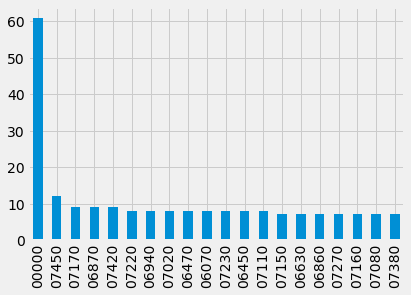

In [15]:
# 对工作种类绘制条形图
salary_ranges["Grade"].value_counts().sort_values(ascending=False).head(20).plot(kind="bar")

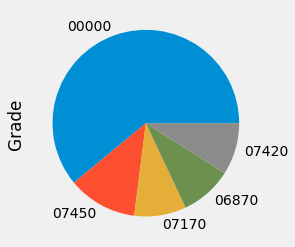

In [13]:
# 对工作种类绘制条形图
salary_ranges["Grade"].value_counts().sort_values(ascending=False).head(5).plot(kind="pie")

<font color="red" size=5>2013年旧金山机场客户满意度调查案例 -- 定序</font>

In [3]:
customer = pd.read_csv("2013_SFO_Customer_survey.csv")
customer.shape

(3535, 95)

In [4]:
# "Q7A_ART"表示与艺术品和展览有关，有0-6的7个类别
art_ratings = customer["Q7A_ART"]
art_ratings.describe()

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [5]:
# 删除0， 6两个类别，并将值转换为字符串
art_ratings = art_ratings[(art_ratings >= 1) & (art_ratings <=5) ]
art_ratings = art_ratings.astype(str)
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

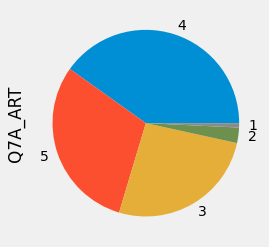

In [6]:
# 使用饼图表使art_rating
art_ratings.value_counts().plot(kind="pie")

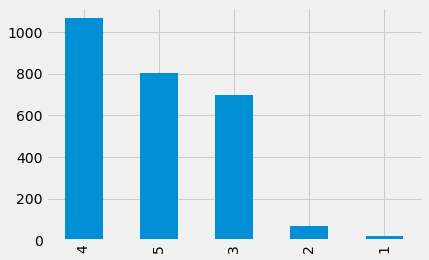

In [7]:
# 使用柱状图表使
art_ratings.value_counts().plot(kind="bar")

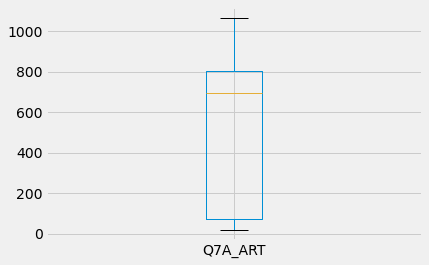

In [8]:
# 使用箱型图表使
art_ratings.value_counts().plot(kind="box")

<font color="red" size=5>全球城市与气候变化案例 -- 定距</font>

In [11]:
climate = pd.read_csv("GlobalLandTemperaturesByCity.csv")
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [22]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235082 entries, 0 to 8599210
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 502.6+ MB


In [15]:
# 删除缺失值
climate.dropna(axis=0, inplace=True)
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [16]:
# 检查缺失值的行数
climate.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [19]:
# 显示AverageTemperature列的独特值的数量
climate["AverageTemperature"].nunique()

111994

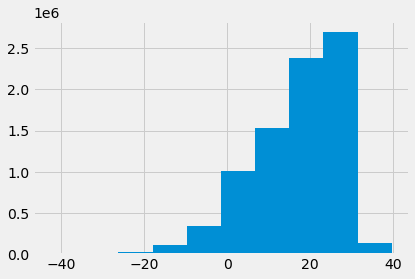

In [20]:
# 直方图
climate["AverageTemperature"].hist()

In [21]:
# 均值约为17度
climate["AverageTemperature"].describe()

count    8.235082e+06
mean     1.672743e+01
std      1.035344e+01
min     -4.270400e+01
25%      1.029900e+01
50%      1.883100e+01
75%      2.521000e+01
max      3.965100e+01
Name: AverageTemperature, dtype: float64

In [31]:
# 将dt clolumn转为datetime, 取年份
climate["dt"] = pd.to_datetime(climate["dt"])
climate["year"] = climate["dt"].map(lambda value: value.year)

In [33]:
climate[["dt", "year"]].head()

,dt,year
0,1743-11-01,1743
5,1744-04-01,1744
6,1744-05-01,1744
7,1744-06-01,1744
8,1744-07-01,1744


In [36]:
# 只看美国的数据
climate_sub_us = climate.loc[climate["Country"] == "United States"]
climate_sub_us.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,1820
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,1820
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,1820
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,1820
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,1820


In [38]:
# 添加新列century, calc: year//100+1
climate_sub_us["century"] = climate_sub_us["year"].map(lambda value: value//100+1)
climate_sub_us.head()

<ipython-input-38-400c2b6e0e3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_sub_us["century"] = climate_sub_us["year"].map(lambda value: value//100+1)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,century
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,1820,19
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,1820,19
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,1820,19
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,1820,19
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,1820,19
